In [154]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

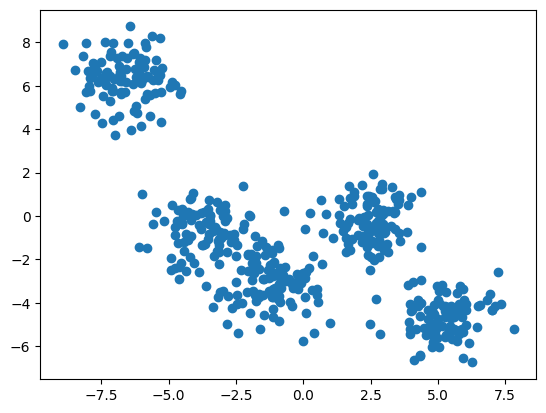

In [247]:
N_SAMPLES = 500
dataset, _ = make_blobs(n_samples=N_SAMPLES, n_features=2, centers=5, cluster_std=1, center_box=(-7, 7), random_state=33)
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

In [254]:
agglomerations = {}
max_score = -1
opt_cluster = None
opt_count = 0
for i in range(2, N_SAMPLES):
    cluster = AgglomerativeClustering(n_clusters=i).fit_predict(dataset)
    score = silhouette_score(dataset, cluster)
    if max_score < score:
        max_score = score
        opt_cluster = cluster
        opt_count = i
    agglomerations[i] = score

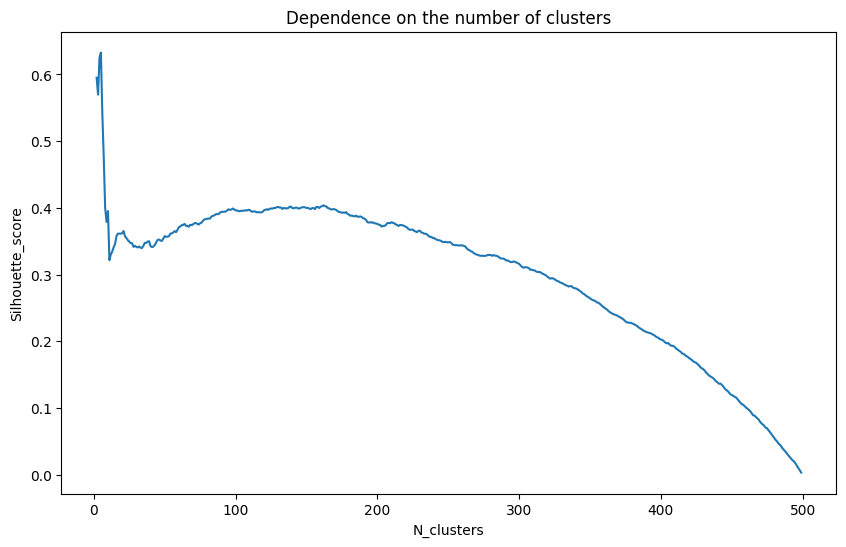

In [249]:
plt.figure(figsize=(10, 6))
plt.plot(agglomerations.keys(), agglomerations.values())
plt.title('Dependence on the number of clusters')
plt.xlabel('N_clusters')
plt.ylabel('Silhouette_score')
plt.show()

In [255]:
pd.DataFrame(agglomerations.items(), columns=['N_clusters', 'Silhouette_score'])

,N_clusters,Silhouette_score
0,2,0.595066
1,3,0.569601
2,4,0.624684
3,5,0.632665
4,6,0.541709
...,...,...
493,495,0.016744
494,496,0.013329
495,497,0.009816
496,498,0.006784


In [250]:
print(f'Max silhouette score: {max_score:.3f}')
print(f'Optimal number of clusters: {opt_count}') 

Max silhouette score: 0.633
Optimal number of clusters: 5


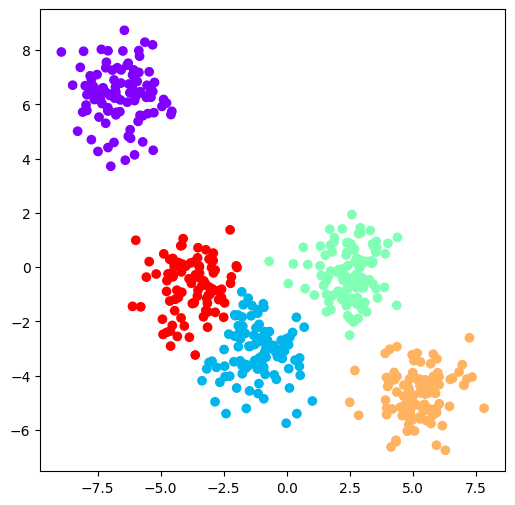

In [251]:
plt.figure(figsize=(6, 6))
plt.scatter(dataset[:, 0], dataset[:, 1],
           c=opt_cluster, cmap ='rainbow')
plt.show()